In [49]:
import numpy as np
import pandas as pd
import scipy as sp
import scipy.stats as sps
import matplotlib.pyplot as plt
import statistics
import math

## Статистическая задача

In [2]:
num_samples = 20

In [3]:
def get_uniform_samples(n):
    uniform_rv = sps.uniform(0, 10)
    all_samples = []
    for i in range(num_samples):
        all_samples.append(uniform_rv.rvs(n))
    
    return np.array(all_samples)

In [4]:
def get_mp_ests(samples):
    mp_ests = np.zeros((num_samples))
    for i in range(len(samples)):
        mp_ests[i] = samples[i].mean()
        
    return mp_ests

In [5]:
def get_medians(samples):
    medians = np.zeros((num_samples))
    for i in range(len(samples)):
        medians[i] = np.median(samples[i])
        
    return medians

In [6]:
def get_estms_stats(esmts):
    mn = esmts.min()
    mx = esmts.max()
    w = mx - mn
    std_dev = statistics.stdev(esmts)
    
    return mn, mx, w, std_dev

def print_stats(name, n, estms):
    mn, mx, w, std = get_estms_stats(estms)
    print('n = {:d}, {}: amin = {:.2f}, amax = {:.2f}, w = {:.2f}, Sa = {:.2f}'.format(n, name, mn, mx, w, std))

In [7]:
def get_estmts_stats_for_num(n):
    samples = get_uniform_samples(n)
    moments = get_mp_ests(samples) * 2
    mp = np.array([(n+1)/n * s.max() for s in samples])
    medians = get_medians(samples) * 2
    if n == 10:
        print(samples[:5])
        print('Значения оценок на k=20 выборках:')
        print('Оценки метода моментов: ', moments)
        print('Оценки максимального правдоподобия: ', mp)
        print('Медианные оценки: ', medians)
        print()
    print_stats('a1', n, moments)
    print_stats('a2', n, mp)
    print_stats('a3', n, medians)
    print()
    
    return moments, mp, medians

In [8]:
a1_10, a2_10, a3_10 = get_estmts_stats_for_num(10)
a1_40, a2_40, a3_40 = get_estmts_stats_for_num(40)
a1_160, a2_160, a3_160 = get_estmts_stats_for_num(160)

[[5.77960425 0.57646923 7.15985788 3.3666907  8.47357772 9.86290074
  7.46089006 9.63421507 1.23656746 6.18669988]
 [3.9313359  7.11026751 4.70548109 2.31735039 3.41192883 6.03383424
  7.23703623 5.85538192 4.55545751 4.8656113 ]
 [2.30681862 5.14318347 1.40000442 0.51194246 5.64055053 3.12468975
  3.26489813 6.10054185 1.80265966 8.41410133]
 [3.00273619 1.87779789 4.82008151 7.8218678  5.60934687 9.24579696
  3.83838126 0.20450593 2.34519769 3.80449097]
 [3.7488392  0.50226134 6.64385603 5.86693711 1.35826264 5.27733179
  4.37620886 3.41422018 8.28452661 0.24218864]]
Значения оценок на k=20 выборках:
Оценки метода моментов:  [11.9474946  10.00473698  7.54187804  8.51404062  7.94292648  9.56682864
  8.96162276 10.39679516  8.88107251 14.60364385 11.8953897   8.72586145
  9.42894735 13.23524315 10.37809968  8.60843015 12.35250266 11.33203063
 10.60260419 11.19692615]
Оценки максимального правдоподобия:  [10.84919081  7.96073985  9.25551146 10.17037666  9.11297927  9.79434095
  9.883400

In [9]:
def draw_estms(a2, a3, flabel, slabel):
    x = np.linspace(0, num_samples, num_samples)
    plt.plot(x, a2, label=flabel)
    plt.plot(x, a3, label=slabel)
    plt.xlabel('Порядковый номер оценки')
    plt.ylabel('Значение оценки')
    plt.legend()

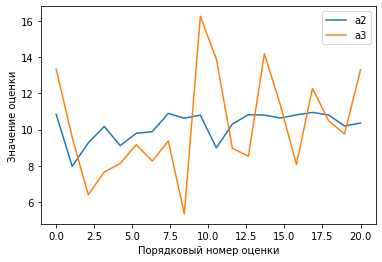

In [10]:
draw_estms(a2_10, a3_10, 'a2', 'a3')

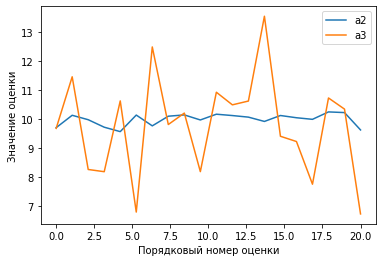

In [11]:
draw_estms(a2_40, a3_40, 'a2', 'a3')

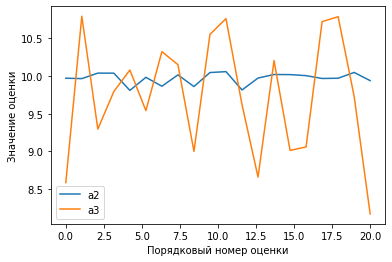

In [12]:
draw_estms(a2_160, a3_160, 'a2', 'a3')

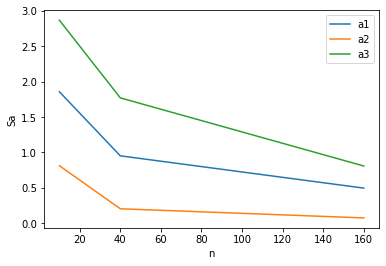

In [13]:
def get_std(list_estms):
    return list(map(statistics.stdev, list_estms))

x = [10, 40, 160]
y1 = get_std([a1_10, a1_40, a1_160])
y2 = get_std([a2_10, a2_40, a2_160])
y3 = get_std([a3_10, a3_40, a3_160])
plt.plot(x, y1, label='a1')
plt.plot(x, y2, label='a2')
plt.plot(x, y3, label='a3')
plt.xlabel('n')
plt.ylabel('Sa')
plt.legend()

## Задание для самостоятельной работы

### Оценка среднего нормального распределения

In [14]:
def get_normal_samples(n):
    normal = sps.norm(loc=0, scale=1)
    all_samples = []
    for i in range(num_samples):
        all_samples.append(normal.rvs(n))
        
    return np.array(all_samples)

In [15]:
def get_estmts_stats_for_num(n):
    samples = get_normal_samples(n)
    mp = get_mp_ests(samples)
    medians = get_medians(samples)
    if n == 10:
        print(samples[:5])
        print('Значения оценок на k=20 выборках:')
        print('Оценки максимального правдоподобия: ', mp)
        print('Медианные оценки: ', medians)
        print()
    print_stats('a1', n, mp)
    print_stats('a2', n, medians)
    print()
    
    return mp, medians

In [16]:
a1_10, a2_10 = get_estmts_stats_for_num(10)
a1_40, a2_40 = get_estmts_stats_for_num(40)
a1_160, a2_160 = get_estmts_stats_for_num(160)

[[ 0.47430473  0.68242671 -1.13674445 -0.90690604 -0.41444324 -0.47841672
  -0.64191753  0.10030276 -1.9419824   0.98155752]
 [ 1.01401838  0.03998455 -1.09621627  0.92153201  1.29453197  0.16676801
   0.71737342  0.37702594 -1.397437   -0.29740429]
 [-1.60013535  1.13367801 -0.04550437 -0.0496072   0.05081683 -0.29881912
   1.35900855 -1.33870471 -0.10911476  1.12819424]
 [ 1.69702653  1.27323352 -0.59946387  0.19735279 -1.26555473 -0.6640822
   0.73102308 -0.92116812 -2.12450751 -0.70294026]
 [ 0.79376777  0.13481965 -0.85928038  1.19367687 -0.89160347 -0.38226587
   0.23240144 -0.09103546 -0.76726998 -1.21669685]]
Значения оценок на k=20 выборках:
Оценки максимального правдоподобия:  [-0.32818187  0.17401767  0.02298121 -0.23790808 -0.18534863 -0.26472299
 -0.12695633  0.45058469 -0.24480769 -0.35892593  0.72569431  0.14684989
 -0.38415985 -0.10504028 -0.66904773 -0.04833665  0.71504178  0.2156642
  0.0816066   0.13439185]
Медианные оценки:  [-0.44642998  0.27189697 -0.04755579 -0.6

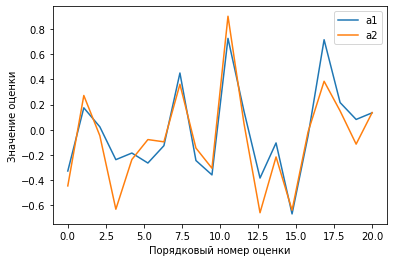

In [17]:
draw_estms(a1_10, a2_10, 'a1', 'a2')

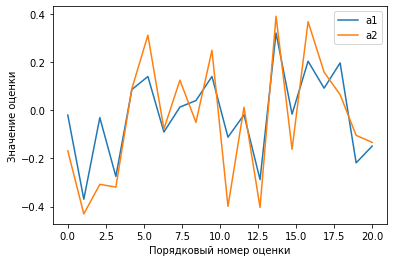

In [18]:
draw_estms(a1_40, a2_40, 'a1', 'a2')

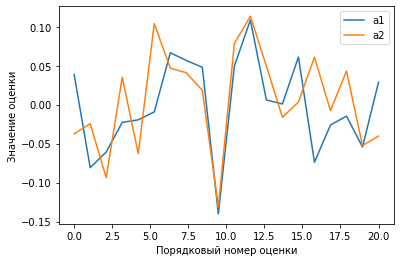

In [19]:
draw_estms(a1_160, a2_160, 'a1', 'a2')

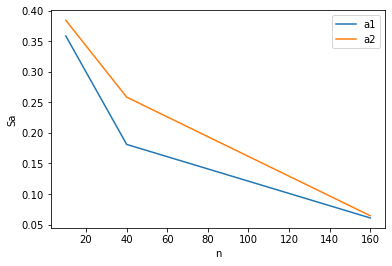

In [20]:
y1 = get_std([a1_10, a1_40, a1_160])
y2 = get_std([a2_10, a2_40, a2_160])
plt.plot(x, y1, label='a1')
plt.plot(x, y2, label='a2')
plt.xlabel('n')
plt.ylabel('Sa')
plt.legend()

### Оценка параметра показательного распределения

In [21]:
def get_expon_samples(n):
    expon_rv = sps.expon(scale=0.2)
    all_samples = []
    for i in range(num_samples):
        all_samples.append(expon_rv.rvs(n))
    
    return np.array(all_samples)

In [22]:
def get_estmts_stats_for_num(n):
    samples = get_expon_samples(n)
    mp = np.array([n / s.sum() for s in samples])
    medians = np.log(2) / get_medians(samples)
    if n == 10:
        print(samples[:5])
        print('Значения оценок на k=20 выборках:')
        print('Оценки максимального правдоподобия: ', mp)
        print('Медианные оценки: ', medians)
        print()
    print_stats('a1', n, mp)
    print_stats('a2', n, medians)
    print()
    
    return mp, medians

In [23]:
a1_10, a2_10 = get_estmts_stats_for_num(10)
a1_40, a2_40 = get_estmts_stats_for_num(40)
a1_160, a2_160 = get_estmts_stats_for_num(160)

[[0.30663364 0.45818093 0.0594514  0.17889594 0.10236152 0.04629613
  0.05914027 0.03403621 0.17197784 0.01414847]
 [0.17203836 0.05785313 0.19477575 0.09523733 0.07023746 0.16457526
  0.15760836 0.06206743 0.6607094  0.2405939 ]
 [0.06759022 0.24527903 0.16164477 0.00937887 0.18098224 0.27755999
  0.17172649 0.18897183 0.02106531 0.12977956]
 [0.23180931 0.03736985 0.0069377  0.05076803 0.47879178 0.25291987
  0.2060282  0.05843741 0.00317956 0.13593654]
 [0.08517861 0.1254046  0.05027855 0.19427607 0.14542434 0.06676121
  0.21075122 0.10732091 0.27004628 0.20450057]]
Значения оценок на k=20 выборках:
Оценки максимального правдоподобия:  [ 6.98752282  5.33135325  6.87768171  6.83911145  6.84958549  5.6301702
 19.70100331  4.55297807  4.58738201  6.61096597  5.26196559  3.87689986
  4.88925193  4.0776422   6.38217059  5.17744553  3.22182156  4.63351408
  5.62626606  5.58269554]
Медианные оценки:  [ 8.56726628  4.30280833  4.15841002  7.13209938  5.1187083   5.03645394
 23.93382872  3.0

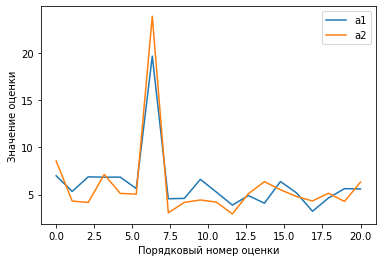

In [24]:
draw_estms(a1_10, a2_10, 'a1', 'a2')

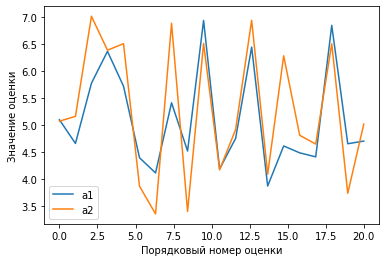

In [25]:
draw_estms(a1_40, a2_40, 'a1', 'a2')

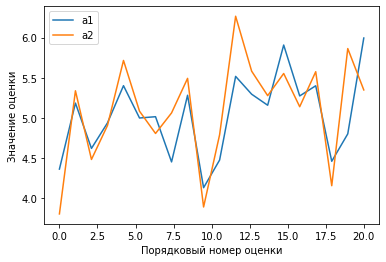

In [26]:
draw_estms(a1_160, a2_160, 'a1', 'a2')

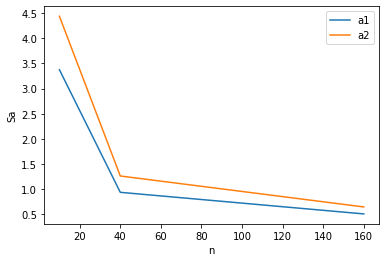

In [27]:
y1 = get_std([a1_10, a1_40, a1_160])
y2 = get_std([a2_10, a2_40, a2_160])
plt.plot(x, y1, label='a1')
plt.plot(x, y2, label='a2')
plt.xlabel('n')
plt.ylabel('Sa')
plt.legend()

## Решение задачи

Количество производственных травм за время T является случайной величиной, распределенной по закону Пуассона с параметром a=λT. Поквартальные данные за k=5 лет оказались x1,x2,…,x20. Если за год число травм оказывается равным N=30 и более, завод подвергается штрафу и проверке. Оценить вероятность этого события в следующем году. Поквартальные данные получить моделированием; среднее значение принять m=6.

In [202]:
def calc_cdf(n, a):
    res = 0
    for k in range(n-1):
        res += (a**k) / (math.factorial(k)) * np.exp(-a)
    
    return res

In [204]:
sample = sps.poisson.rvs(6, size=20)
print(sample)
a = sample.mean()
print('Оценка параметра а:', a)
print(calc_cdf(30, a), 1-calc_cdf(30, a))
print('P{N >= 30} = 1 - P{N < 30} = 1 - Fp(30) =', 1 - calc_cdf(30, a))

[ 4  6  6  3  5  7  7  8  5 10  3  7  7  3  9  5 10  3  6  6]
Оценка параметра а: 6.0
0.9999999999871132 1.2886802736034042e-11
P{N >= 30} = 1 - P{N < 30} = 1 - Fp(30) = 1.2886802736034042e-11
